In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from pycaret.classification import *
import shap

## Loading data

In [8]:
customer_data= pd.read_csv('term-deposit-marketing-2020.csv')
customer_data.shape

(40000, 14)

In [9]:
customer_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [10]:
customer_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [95]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [97]:
customer_data.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

## Data preprocessing

Text(0.5, 1.0, 'Boxplot of Age feature')

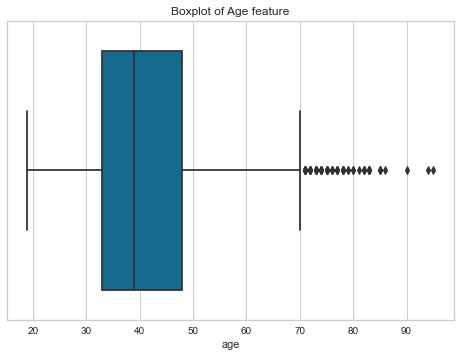

In [21]:
# Review outliers on age
sns.boxplot(customer_data['age'])
plt.title('Boxplot of Age feature')

Text(0.5, 1.0, 'Boxplot of Balance feature')

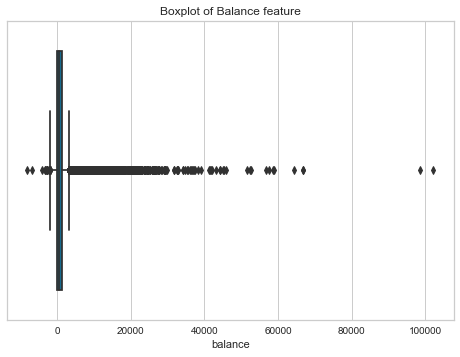

In [23]:
# Review outliers on balance
sns.boxplot(customer_data['balance'])
plt.title('Boxplot of Balance feature')

Text(0.5, 1.0, 'Boxplot of Day feature')

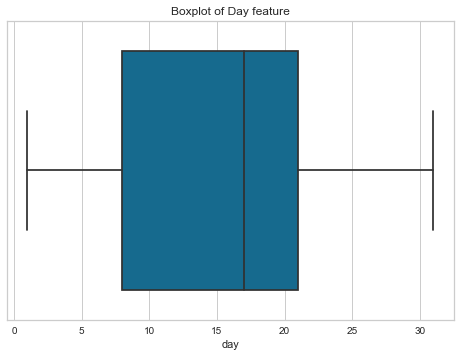

In [25]:
# Review outliers on day
sns.boxplot(customer_data['day'])
plt.title('Boxplot of Day feature')

Text(0.5, 1.0, 'Boxplot of Duration feature')

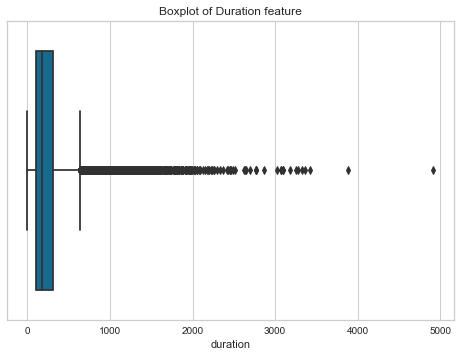

In [38]:
# Review outliers on duration
sns.boxplot(customer_data['duration'])
plt.title('Boxplot of Duration feature')

Text(0.5, 1.0, 'Boxplot of Campaign feature')

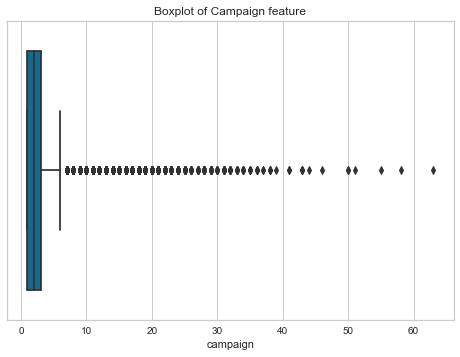

In [107]:
# Review outliers on duration
sns.boxplot(customer_data['campaign'])
plt.title('Boxplot of Campaign feature')

In [108]:
#Inspect correlations
customer_data.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


In [31]:
# Separate numerical variables
numerical_cols = ['age','duration','balance','campaign','day']

In [32]:
numerical_df = customer_data[numerical_cols]

In [59]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_df_transf = pd.DataFrame(scaler.fit_transform(numerical_df),columns=numerical_df.columns)
numerical_df_transf

,age,duration,balance,campaign,day
0,1.810415,0.023811,0.299174,-0.581096,-1.330900
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900
...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504


## Model Selection and Training

### Using PyCaret

In [46]:
# sample 5% of data to be used as unseen data
data = customer_data.sample(frac=0.95, random_state=786)
data_unseen = customer_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [99]:
# init setup

s = setup(data = data, target = 'y', fold=5, session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(38000, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [100]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9394,0.9515,0.4185,0.6068,0.4950,0.4640,0.4732,4.1240
lightgbm,Light Gradient Boosting Machine,0.9387,0.9501,0.4254,0.5965,0.4962,0.4646,0.4723,0.5280
gbc,Gradient Boosting Classifier,0.9381,0.9439,0.3635,0.6081,0.4540,0.4235,0.4398,1.9420
xgboost,Extreme Gradient Boosting,0.9379,0.9471,0.4254,0.5886,0.4934,0.4612,0.4684,3.3040
rf,Random Forest Classifier,0.9363,0.9392,0.2937,0.6096,0.3957,0.3664,0.3942,1.3940
lr,Logistic Regression,0.9356,0.9220,0.2619,0.6076,0.3657,0.3374,0.3711,4.9300
lda,Linear Discriminant Analysis,0.9349,0.9285,0.4423,0.5528,0.4907,0.4565,0.4601,0.1840
ridge,Ridge Classifier,0.9331,0.0000,0.1577,0.6163,0.2506,0.2283,0.2883,0.0700
ada,Ada Boost Classifier,0.9329,0.9300,0.3249,0.5459,0.4071,0.3740,0.3883,0.6260
et,Extra Trees Classifier,0.9328,0.9210,0.2190,0.5752,0.3164,0.2885,0.3265,1.3680


In [101]:
best_model

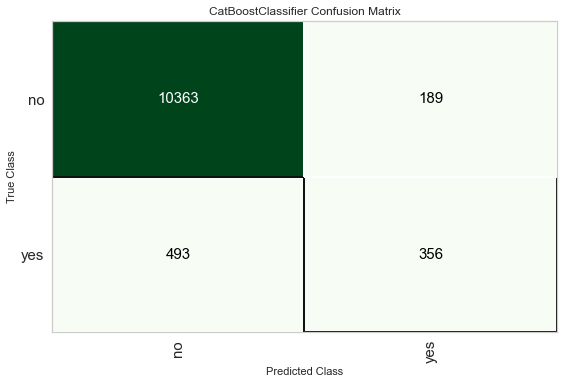

In [102]:
plot_model(best_model, plot = 'confusion_matrix')

In [103]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [104]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9402,0.9491,0.4193,0.6532,0.5108,0.4805,0.4939


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y,Label,Score
0,40.0,376.0,11.0,268.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9990
1,59.0,3353.0,12.0,148.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9989
2,31.0,0.0,29.0,82.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9994
3,39.0,0.0,16.0,41.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9999
4,30.0,2030.0,28.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,32.0,12686.0,3.0,54.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9999
11397,50.0,0.0,6.0,327.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9774
11398,45.0,276.0,9.0,346.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9945
11399,51.0,371.0,4.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9975


<b> The CatBoost model allows us to predict if a customer will subscribe or not with over 94% accuracy

## We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

In [109]:
import shap